In [1]:
import os

current = './googlereview_all/14000/'
all_files = os.listdir(current+'/refined_models/')
max=0
for each_file in all_files:

    cur = ((each_file.split('_')[-1])[:-3])
    if int(cur) < max:
        if (int(cur) % 800) != 0:
            print(each_file)
            try:
                os.remove(current+'/refined_models/'+each_file)
            except:
                print("not_found")

# preprocessing for pretraining CC

In [8]:


!onmt_preprocess  \
    -train_src googlereview_all/14000/training_data/cc/src-train.txt \
    -train_tgt googlereview_all/14000/training_data/cc/tgt-train.txt \
    -valid_src googlereview_all/14000/training_data/cc/src-train.txt \
    -valid_tgt googlereview_all/14000/training_data/cc/tgt-train.txt \
    -save_data googlereview_all/14000/cc/revision_data \
    -src_vocab googlereview_all/14000/vocab/source_vocab_10000.txt \
    -tgt_vocab googlereview_all/14000/vocab/target_vocab_10000.txt \
    -src_vocab_size 10000 \
    -tgt_vocab_size 2000 \
    -src_seq_length 600 \
    -src_seq_length_trunc 600 \
    -tgt_seq_length 100 \
    -tgt_seq_length_trunc 100 \
    -dynamic_dict \
    -overwrite

#-valid_src raw_data/cc/mild-src-test.txt \
#    -valid_tgt raw_data/cc/mild-tgt-test.txt \

[2021-01-05 19:04:42,585 INFO] Extracting features...
[2021-01-05 19:04:42,819 INFO]  * number of source features: 0.
[2021-01-05 19:04:42,819 INFO]  * number of target features: 0.
[2021-01-05 19:04:42,819 INFO] Building `Fields` object...
[2021-01-05 19:04:42,819 INFO] Building & saving training data...
[2021-01-05 19:04:42,819 INFO] Using existing vocabulary...
[2021-01-05 19:04:42,879 INFO] Building vocab from text file...
[2021-01-05 19:04:42,879 INFO] Loading src vocabulary from googlereview_all/14000/vocab/source_vocab_10000.txt
[2021-01-05 19:04:42,891 INFO] Loaded src vocab has 10000 tokens.
[2021-01-05 19:04:42,894 INFO] Loading tgt vocabulary from googlereview_all/14000/vocab/target_vocab_10000.txt
[2021-01-05 19:04:42,962 INFO] Loaded tgt vocab has 2000 tokens.
[2021-01-05 19:04:55,192 INFO]  * tgt vocab size: 2004.
[2021-01-05 19:04:55,200 INFO]  * src vocab size: 10002.
[2021-01-05 19:04:55,276 INFO] Building & saving validation data...


In [5]:
print("hello")

hello


In [6]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [ ]:
import os

cmd_line = 'onmt_train -batch_size 8 -report_every 200 -world_size 1 -gpu_ranks 0 -copy_attn -global_attention mlp -word_vec_size 256 -rnn_size 512 -layers 1 -encoder_type brnn -train_steps 90000 -max_grad_norm 2 -dropout 0.  -optim adagrad -learning_rate 0.15 -adagrad_accumulator_init 0.1 -reuse_copy_attn -copy_loss_by_seqlength -bridge -seed 777   -save_checkpoint_steps 100   -keep_checkpoint 200 '
while True:

    all_files = os.listdir(current+'/refined_models')
    latest = 0
    latest_file = ''
    for each_file in all_files:
        cur = ((each_file.split('_')[-1])[:-3])
        if int(latest) < int(cur):
            latest = cur
            latest_file = current+'/refined_models/' + each_file
    print(latest, latest_file)
    
    max=latest
    for each_file in all_files:

        cur = ((each_file.split('_')[-1])[:-3])
        if int(cur) < int(max):
            if (int(cur) % 800) != 0:
                print(each_file)
                try:
                    print("removing: "+current+'/refined_models/'+each_file)
                    os.remove(current+'/refined_models/'+each_file)
                except:
                    print("not_found")
    if latest_file != '':
        cmd = cmd_line + ' -train_from ' + latest_file + ' -data ' + current+'cc/revision_data' + ' -save_model ' + current+'refined_models/cc'
    else:
         cmd = cmd_line + ' -data ' + current+'cc/revision_data' + ' -save_model ' + current+'refined_models/cc'
    
    print(cmd)
    os.system(cmd)
    #break

29900 ./googlereview_all/14000//refined_models/cc_step_29900.pt
cc_step_21700.pt
removing: ./googlereview_all/14000//refined_models/cc_step_21700.pt
cc_step_21800.pt
removing: ./googlereview_all/14000//refined_models/cc_step_21800.pt
cc_step_21900.pt
removing: ./googlereview_all/14000//refined_models/cc_step_21900.pt
cc_step_22000.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22000.pt
cc_step_22100.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22100.pt
cc_step_22200.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22200.pt
cc_step_22300.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22300.pt
cc_step_22500.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22500.pt
cc_step_22600.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22600.pt
cc_step_22700.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22700.pt
cc_step_22800.pt
removing: ./googlereview_all/14000//refined_models/cc_step_22800.pt
c

30100 ./googlereview_all/14000//refined_models/cc_step_30100.pt
onmt_train -batch_size 8 -report_every 200 -world_size 1 -gpu_ranks 0 -copy_attn -global_attention mlp -word_vec_size 256 -rnn_size 512 -layers 1 -encoder_type brnn -train_steps 90000 -max_grad_norm 2 -dropout 0.  -optim adagrad -learning_rate 0.15 -adagrad_accumulator_init 0.1 -reuse_copy_attn -copy_loss_by_seqlength -bridge -seed 777   -save_checkpoint_steps 100   -keep_checkpoint 200  -train_from ./googlereview_all/14000//refined_models/cc_step_30100.pt -data ./googlereview_all/14000/cc/revision_data -save_model ./googlereview_all/14000/refined_models/cc
30200 ./googlereview_all/14000//refined_models/cc_step_30200.pt
cc_step_30100.pt
removing: ./googlereview_all/14000//refined_models/cc_step_30100.pt
onmt_train -batch_size 8 -report_every 200 -world_size 1 -gpu_ranks 0 -copy_attn -global_attention mlp -word_vec_size 256 -rnn_size 512 -layers 1 -encoder_type brnn -train_steps 90000 -max_grad_norm 2 -dropout 0.  -optim ad

In [ ]:
import torch
torch.cuda.is_available()

# main preprocessing and training after pretraining starts here 

checkpoint =  800
6410
641
beam match =  True
top-1 0.1544461778471139
top-5 0.15912636505460218
top-10 0.15912636505460218


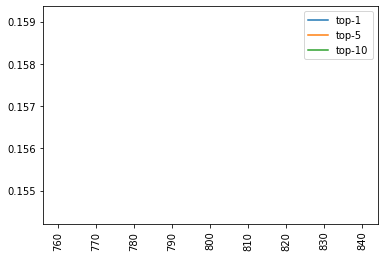

checkpoint =  1600
6410
641
beam match =  True
top-1 0.1544461778471139
top-5 0.16380655226209048
top-10 0.16536661466458658


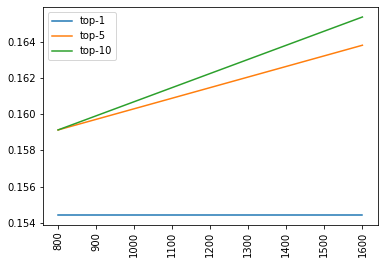

checkpoint =  2400
6410
641
beam match =  True
top-1 0.1684867394695788
top-5 0.2059282371294852
top-10 0.20748829953198128


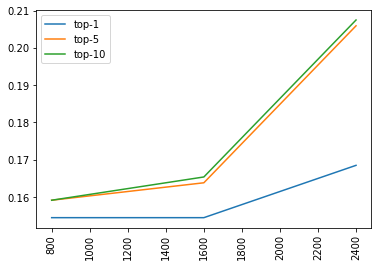

checkpoint =  3200
6410
641
beam match =  True
top-1 0.15288611544461778
top-5 0.20436817472698907
top-10 0.2121684867394696


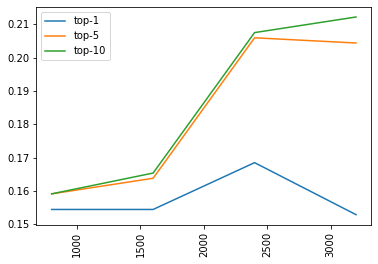

checkpoint =  4000
6410
641
beam match =  True
top-1 0.17160686427457097
top-5 0.2121684867394696
top-10 0.23400936037441497


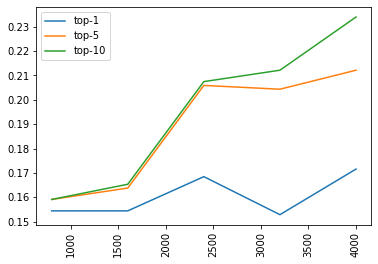

checkpoint =  4800
6410
641
beam match =  True
top-1 0.14664586583463338
top-5 0.22776911076443057
top-10 0.2823712948517941


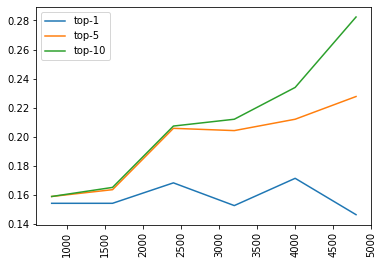

checkpoint =  5600
6410
641
beam match =  True
top-1 0.17160686427457097
top-5 0.26053042121684866
top-10 0.296411856474259


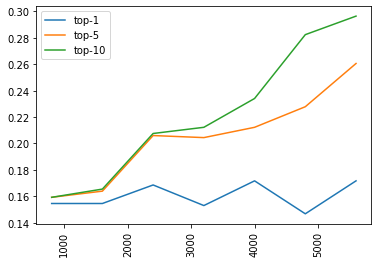

checkpoint =  6400
6410
641
beam match =  True
top-1 0.1622464898595944
top-5 0.24960998439937598
top-10 0.30109204368174725


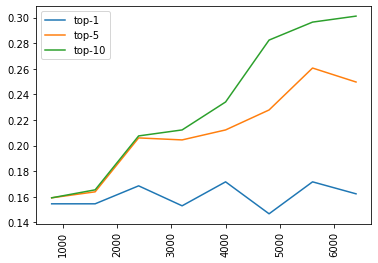

checkpoint =  7200
6410
641
beam match =  True
top-1 0.17004680187207488
top-5 0.2574102964118565
top-10 0.28081123244929795


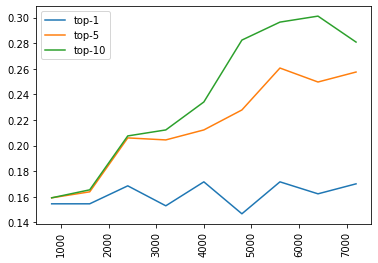

checkpoint =  8000
6410
641
beam match =  True
top-1 0.17160686427457097
top-5 0.22932917316692666
top-10 0.26365054602184085


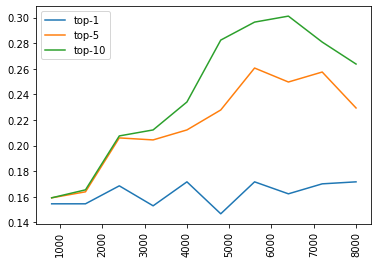

checkpoint =  8800
5200
641
beam match =  False


IndexError: list index out of range

In [2]:
import matplotlib.pyplot as plt
import os
from os import path
%matplotlib inline

top_1 = []
top_5 = []
top_10 = []
x_axis = []
cnt= 0

cmd_line = 'onmt_translate -gpu 0 -batch_size 8 -max_length 200 -stepwise_penalty -beta 5 -length_penalty wu -alpha 0.9 -replace_unk -block_ngram_repeat 3 -ignore_when_blocking "." "</t>" "<t>" -n_best 10 -beam_size 10'

#preprocessed_cc_pointer_gen_without_space_step_800.pt
for cp in range(800,60000,800):
    #cp = 163200
    checkpoint_number = cp
    cnt+=1
    print("checkpoint = ", cp)
    model_name = current+'refined_models/cc'
    out_file = current+'per_project_output/'+"out-{}.txt".format(checkpoint_number)
    checkpoint = model_name+"_step_{}.pt".format(checkpoint_number)
    #print("######### ", path.exists("output/c/"+out_file))
    
    if not path.exists(checkpoint):
        print("here")
        continue
        
    if not path.exists(out_file):
        
        print("here")
        #continue
        cmd = cmd_line + ' -model ' + checkpoint + ' -output ' + out_file + ' -src ' + current+'training_data/cc/src-test.txt'
        print(cmd)
        os.system(cmd)

    pred = open(out_file, 'r', encoding= 'utf-8').read()
    tgt = open(current+'training_data/cc/tgt-test.txt', 'r', encoding= 'utf-8').read()

    beam_size = 10
    preds = pred.split('\n')[:-1]
    tgts = tgt.split('\n')[:-1]
    print(len(preds))
    print(len(tgts))
    print("beam match = ", len(preds)== len(tgts)*beam_size)

    correct_1 = 0
    correct_5 = 0
    correct_10 = 0
    for i in range(len(tgts)):
        min_dis = 10000
        match_idx = -1
        #if "<|del|> <|nl|>" in tgt_train[i]:
        #    del_total+=1
        for j in range(10):
            if(tgts[i]==preds[i*beam_size+j]):
                if j <=0:
                    correct_1 +=1
                if j <=4:
                    correct_5 +=1
                if j <=9:
                    correct_10 +=1
    print("top-1", correct_1/len(tgts))
    print("top-5",correct_5/len(tgts))
    print("top-10",correct_10/len(tgts))
    x_axis.append(cp)
    top_1.append(correct_1/len(tgts))
    top_5.append(correct_5/len(tgts))
    top_10.append(correct_10/len(tgts))
    
    plt.plot(x_axis,top_1, label='top-1')
    plt.plot(x_axis,top_5, label='top-5')
    plt.plot(x_axis,top_10, label='top-10')
    plt.legend()
    #plt.xticks(x_axis)
    plt.xticks(rotation=90)
    plt.show()
    

In [11]:
import numpy as np
top_10_np = np.array(top_10)

print(np.argmax(top_10_np), top_10_np[np.argmax(top_10_np)])

top_5_np = np.array(top_5)

print(np.argmax(top_5_np), top_5_np[np.argmax(top_5_np)])

8 0.3088923556942278
2 0.26053042121684866


In [ ]:
#training on 130400
import matplotlib.pyplot as plt
%matplotlib inline
a = open('./training_data/cc/tgt-test.txt','r',  encoding = 'utf-8').readlines()
lst = []

for i in a:
    lst.append(len(i.split(' ')))
plt.hist(lst)
plt.show()
print(len(lst))
#print(len(a))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
a = open('./training_data/cc/tgt-train.txt','r',  encoding = 'utf-8').readlines()
lst = []
for i in a:
    lst.append(len(i.split(' ')))
plt.hist(lst)
plt.show()
#print(len(a))

In [ ]:
!onmt_translate -gpu 0 -batch_size 50 -src training_data/cc/src-test.txt -max_length 200 -stepwise_penalty -beta 5 -length_penalty wu -alpha 0.9 -replace_unk -block_ngram_repeat 3 -ignore_when_blocking "." "</t>" "<t>" -n_best 10 -beam_size 10 -model ./refined_models/cc_step_0.pt -output ./revised_output/out-0.txt

In [ ]:
!dir